Классификационное дерево — средство поддержки принятия решений, использующееся в машинном обучении, анализе данных и статистике. Структура дерева представляет собой «листья» и «ветки». На рёбрах дерева решения записаны признаки, от которых зависит целевая функция, в «листьях» записаны значения целевой функции, а в остальных узлах — признаки, по которым различаются случаи. Чтобы классифицировать новый случай, надо спуститься по дереву до листа и выдать соответствующее значение.
Подобные деревья решений широко используются в интеллектуальном анализе данных. Цель состоит в том, чтобы создать модель, которая предсказывает значение целевой переменной на основе нескольких переменных на входе.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, mean_absolute_error, mean_squared_error

In [30]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)
df["target"] = iris.target

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [31]:
X, y = load_iris(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

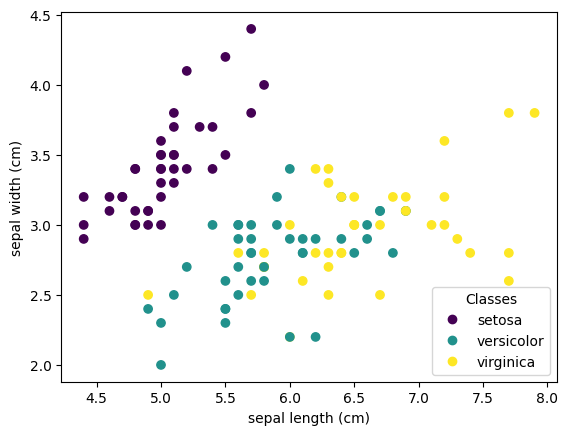

In [32]:
_, ax = plt.subplots()
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])

_ = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

In [33]:
clf = tree.DecisionTreeClassifier(max_depth=16).fit(X_train[:, :2], y_train)

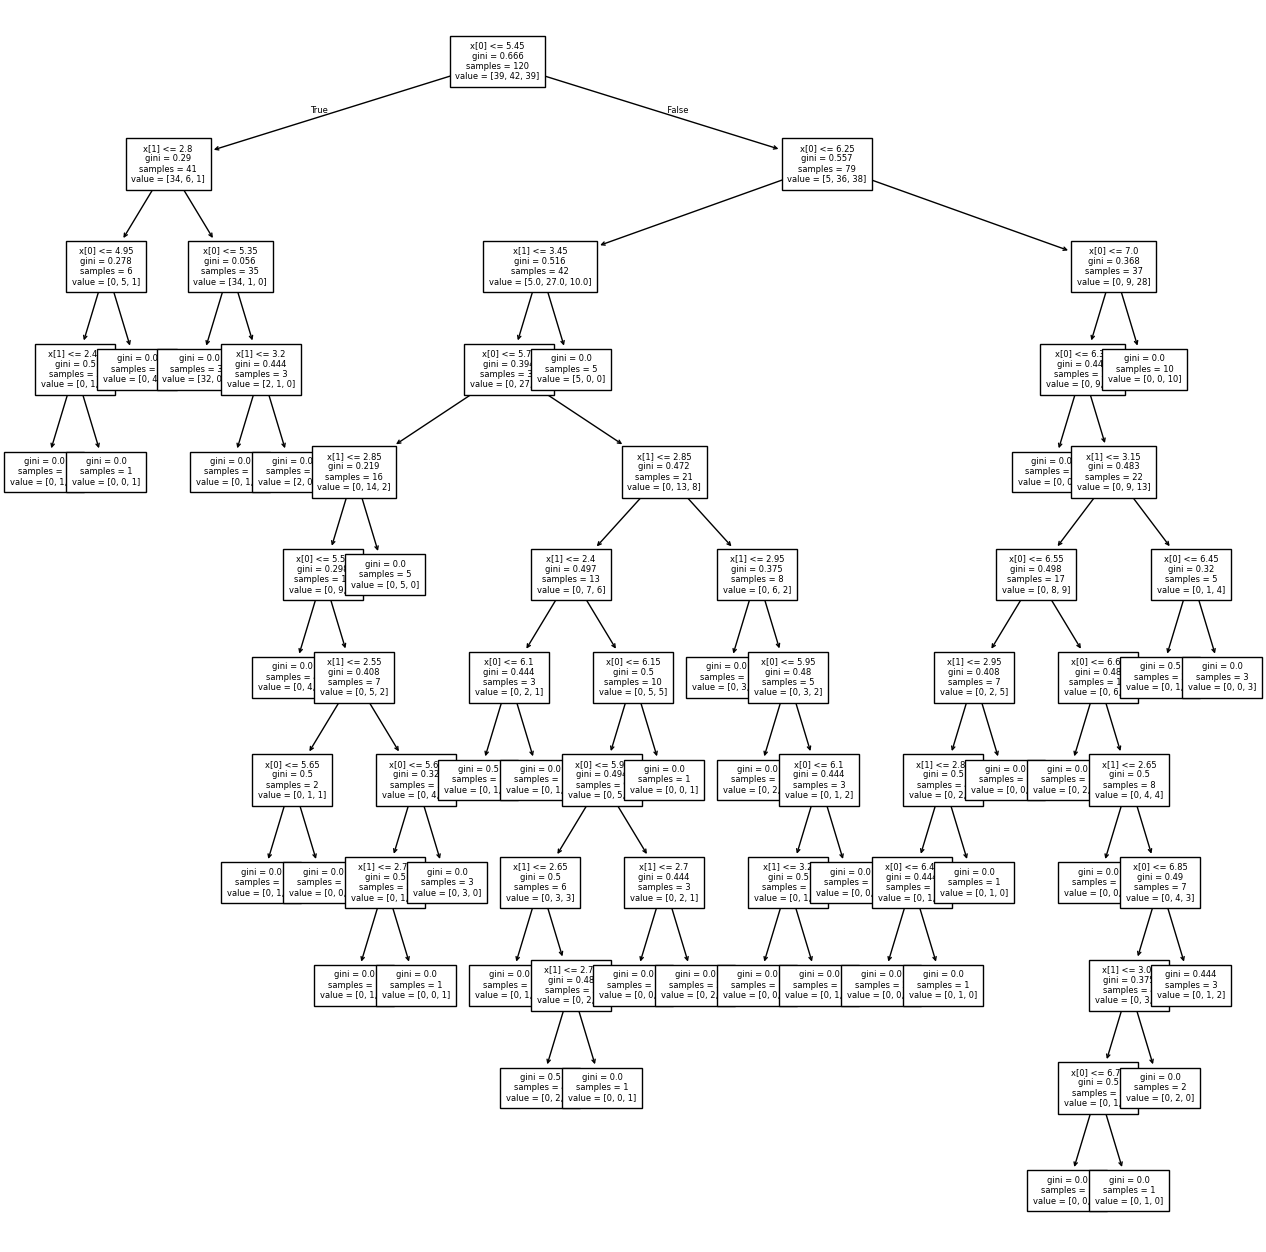

In [34]:
plt.figure(figsize=(16,16))
tree.plot_tree(clf, fontsize=6)
plt.show()

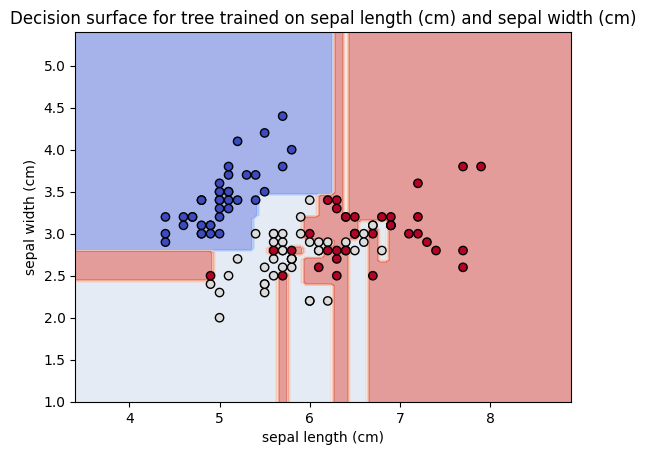

In [35]:
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train[:, :2],
    response_method="predict",
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
    alpha=0.5,
    cmap=plt.cm.coolwarm
)

# Plotting the data points
disp.ax_.scatter(X_train[:, 0], X_train[:, 1],
                 c=y_train, edgecolor="k",
                 cmap=plt.cm.coolwarm)

plt.title(f"Decision surface for tree trained on {iris.feature_names[0]} and {iris.feature_names[1]}")
plt.show()

In [36]:
y_pred = clf.predict(X_test[:, :2])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))

Accuracy: 0.6666666666666666
Precision: 0.6349206349206349
Recall: 0.6287878787878788


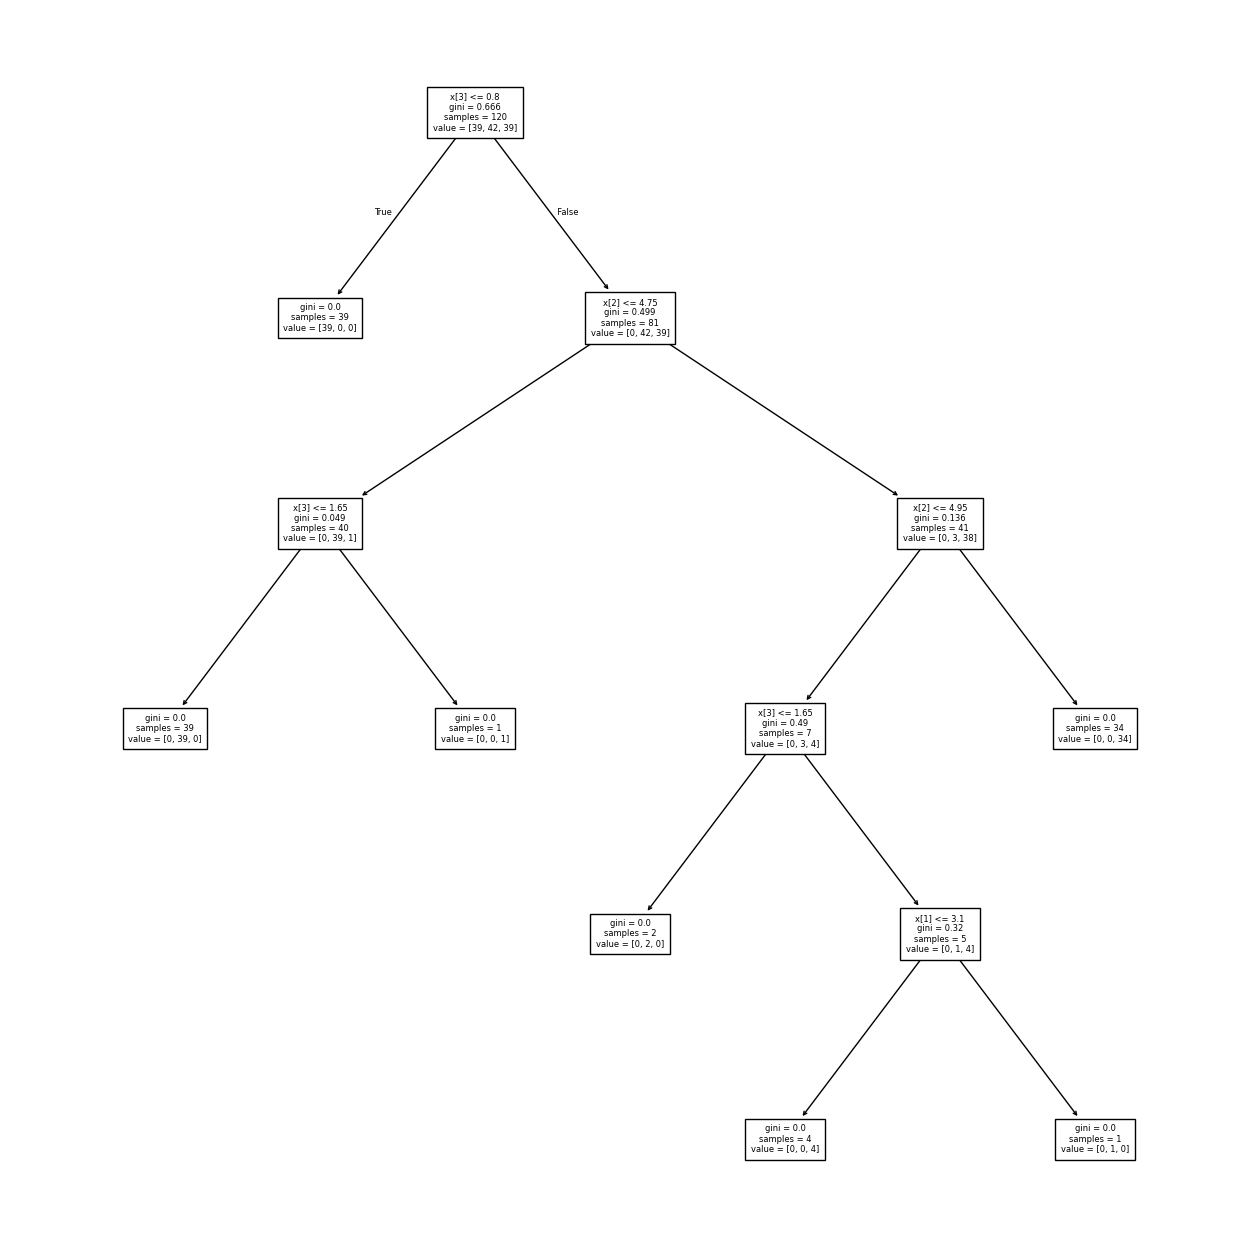

In [37]:
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)

plt.figure(figsize=(16,16))
tree.plot_tree(clf, fontsize=6)
plt.show()

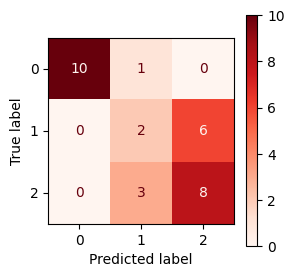

In [38]:
cf_mat = confusion_matrix(y_test, y_pred)

cm_fig, cm_ax = plt.subplots(figsize=(3, 3))
cf_mat_disp = ConfusionMatrixDisplay(cf_mat)
cf_mat_disp.plot(ax=cm_ax, cmap=plt.cm.Reds)

plt.show()

In [39]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))

Accuracy: 0.9333333333333333
Precision: 0.9487179487179488
Recall: 0.9166666666666666
